В этом блокноте собраны результаты выполнения практических заданий по открытому Stepik-курсу Влада Шахуро [Обработка изображений](https://stepik.org/course/1280). Нумерация соответствует нумерации разделов курса.

# 2.1. Цифровое изображение. Чтение, запись, работа с пикселями

## 2.1.1 Чтение, запись изображений. Работа с пикселями

Чтобы просматривать изображения сразу в браузере, воспользуемся следующей командой.

In [1]:
%matplotlib inline

Импортируем функции для загрузки, просмотра и сохранения изображений.

In [52]:
from skimage.io import imread, imshow, imsave
import matplotlib.pyplot as plt

Загрузим изображение и сохраним в переменной.

In [3]:
img = imread('images/tiger-color.png')

Посмотрим на загруженное изображение:

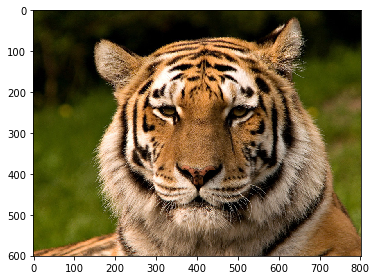

In [4]:
imshow(img)

Узнаем размер изображения:

In [5]:
img.shape

(601, 801, 3)

Посмотрим, как записана информация о конкретном пикселе (на носу тигра):

In [6]:
img[383, 374]

array([204, 117,  79], dtype=uint8)

В конце указан тип чисел, в которых хранится цвет.

Изменим цвет пикселя на желтый и сохраним изображение.

In [7]:
img[383, 374] = [255, 255, 0]

In [8]:
imsave('images/tiger-yellow-nose.png', img)

## 2.1.2. Работа с диапазонами. Копирование изображений

Посмотрим на прямоугольную область изображения, которая содержит нос тигра. Для этого будем использовать срезы Python.

In [9]:
img = imread('images/tiger-color.png')

In [10]:
nose = img[370:410, 350:440]

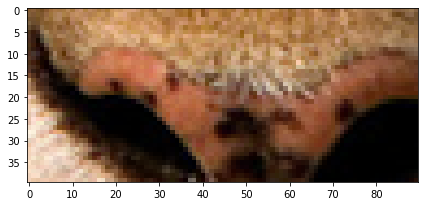

In [11]:
imshow(nose)

Изменим выделенную часть изображения. Изменим цвет на малиновый.

In [12]:
img[370:410, 350:440] = [255, 0, 255]

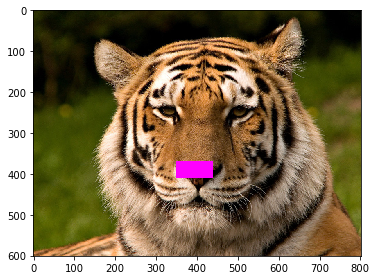

In [13]:
imshow(img)

Давайте загрузим изображение с желтым пикселем.

In [14]:
img_yellow = imread('images/tiger-yellow-nose.png')

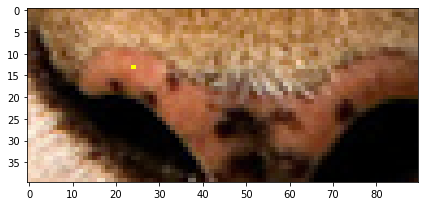

In [15]:
imshow(img_yellow[370:410, 350:440])

Теперь мы действительно видим, что поменяли цвет пикселя на носу с оранжевого на желтый.

Теперь давайте обсудим копирование изображений. Выполним два присваивания:

In [16]:
img_assigned = img_yellow

In [17]:
img_copy = img_yellow.copy()

В первом случае происходит переприсваивание переменной, но не изменение объекта. Во втором случае создается копия изображения.

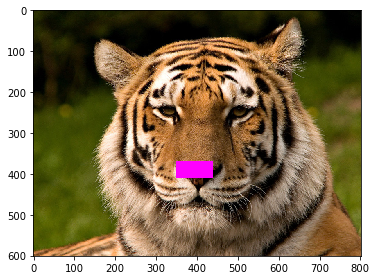

In [18]:
img_yellow[370:410, 350:440] = [255, 0, 255]
imshow(img_yellow)

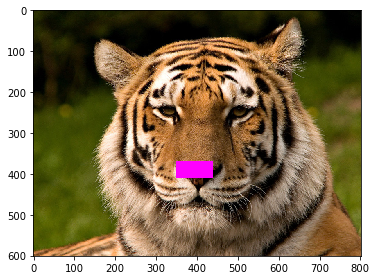

In [19]:
imshow(img_assigned)

`img_assigned` Ссылается на то же изображение. А с копией всё в порядке:

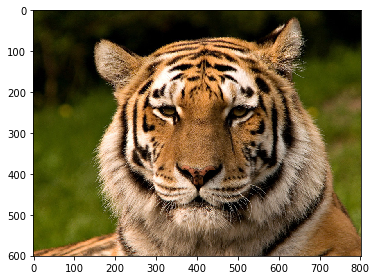

In [20]:
imshow(img_copy)

# 2.2. Арифметические операции. Каналы. Вычисление яркости изображения

## 2.2.1. Арифметические операции над изображениями

Загрузим изображение тигра и определим тип хранения чисел:

In [21]:
img = imread('images/tiger-color.png')
img.dtype

dtype('uint8')

Числа изображения хранятся в формате `uint8`, то есть изображение описано с помощью 8-битовых (1-байтовых) чисел – от 0 до 255.

Загрузим функцию преобразования чисел изображения из целых в вещественные и преобразуем изображение:

In [22]:
from skimage import img_as_float
img_f = img_as_float(img)

Сравним минимальные и максимальные значения для двух типов  

In [23]:
img.min(), img.max()

(0, 255)

In [24]:
img_f.min(), img_f.max()

(0.0, 1.0)

Дробный тип удобен для изменения контрастности и яркости изображения:

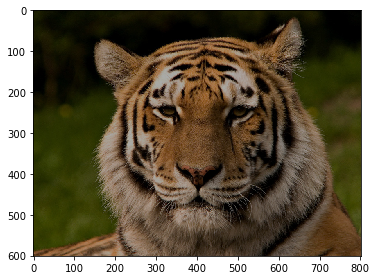

In [25]:
imshow(img_f/1.5)

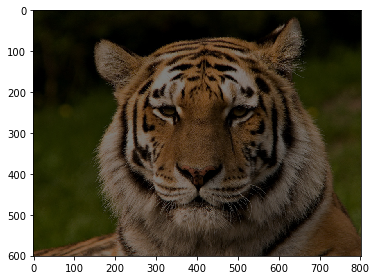

In [26]:
imshow(img_f/2)

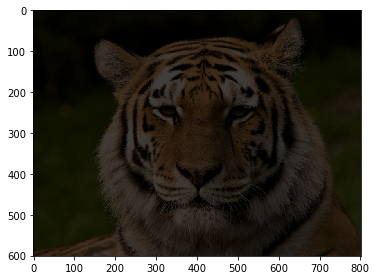

In [27]:
imshow(img_f/4)

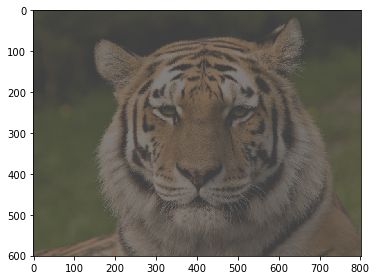

In [28]:
imshow(img_f/4 + 0.25)  # эффект белесости

Чтобы значения помещались в диапзаон, может потребоваться «обрезка» краевых значений до пороговых 0.0 и 1.0.

In [29]:
from numpy import clip

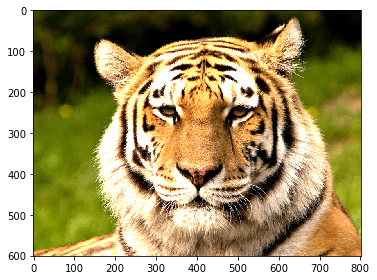

In [30]:
imshow(clip(img_f * 1.5, 0, 1))

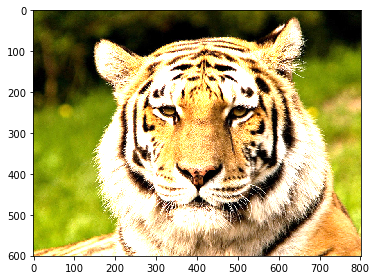

In [31]:
imshow(clip(img_f * 2.0, 0, 1))

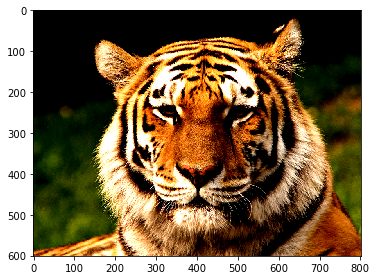

In [32]:
imshow(clip(img_f * 2.0 - 0.5, 0, 1))

# 2.2.2. Работа с каналами изображения

In [33]:
img = imread('images/tiger-color.png')

Преобразуем изображение в представлении вещественных чисел, чтобы применять арифметические операции.

In [34]:
img_f = img_as_float(img)

Научимся извлекать каналы из цветного изображения. 

In [35]:
r = img_f[:, :, 0]  # красный канал, берем все строки и столбцы

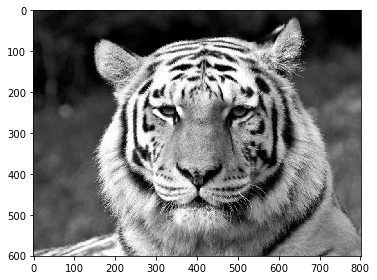

In [36]:
imshow(r)

In [37]:
g = img_f[:, :, 1]  # зеленый канал

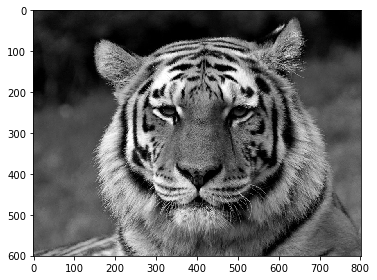

In [38]:
imshow(g)

In [39]:
b = img_f[:, :, 2]

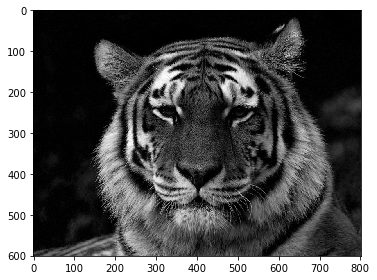

In [40]:
imshow(b)

Составим изображение из трех каналов.

In [41]:
from numpy import dstack

In [42]:
img_combined = dstack((r, g, b))

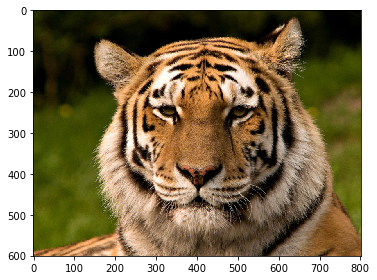

In [43]:
imshow(img_combined)

Что будет если поменять каналы местами?

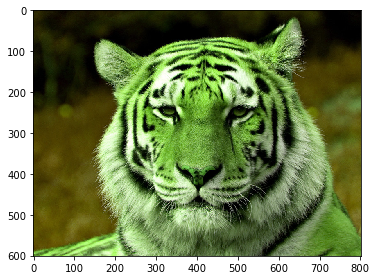

In [44]:
imshow(dstack((g, r, b)))

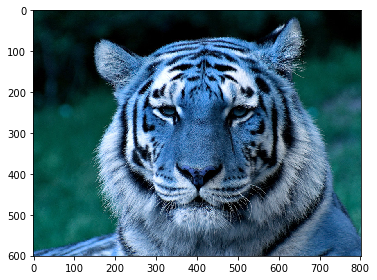

In [45]:
imshow(dstack((b, g, r)))

Усредним три канала, получим изображения в оттенках серого.

In [46]:
avg_gray = (r + g + b) / 3

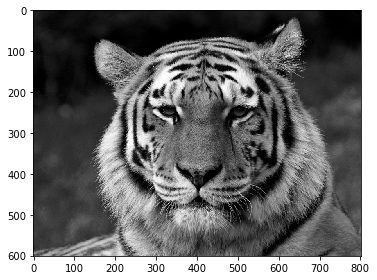

In [47]:
imshow(avg_gray)

# 2.2.3. Вычисление яркости изображения

Зеленая компонента вносит наибольший вклад в восприятие яркости изображения. Простое усреднение каналов воспринимается как менее яркое. Можно использовать готовую функцию, в которой разным каналам сопоставлены разные веса.

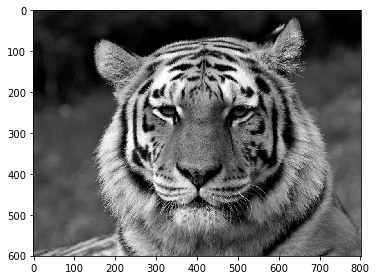

In [48]:
import skimage

imshow(skimage.color.rgb2gray(img))

Сравним с использованием коэффициентов

In [49]:
gray = 0.2126*r + 0.7152*g + 0.0722*b

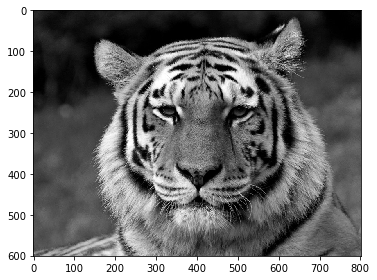

In [50]:
imshow(gray)

# 3. Коррекция яркости и света
## 3.1. Линейная коррекция контраста

### 3.1.1. Гистограмма изображения. Автоконтраст
При помощи гистограммы можно повысить контрастность изображения. Пусть у нас есть чёрно-белое изображение. Гистограммой изображения назовём график, у которого по оси $x$ отложена яркость, а по оси $y$ – количестов пикселей, принимающих значение такой яркости.

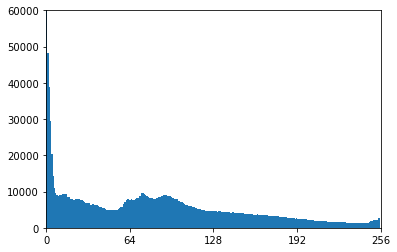

In [53]:
import numpy as np

img = imread('images/tiger-color.png')

plt.hist(img.ravel(), bins=256)
plt.xlim(0, 256)
plt.ylim(0, 60000)
plt.xticks(np.arange(0, 257, 64))
plt.show()

Видим много пикселей соответствующих 0, потому что много чёрного цвета. Также видим, что близкие к чёрному цвета (0-48) и тёмно-серый (64-100) превалируют на этом изображении.
Рассмотрим другое изображение, полученное делением всех пикселей исходного изображения на 2. Это будет малоконтрастное изображение.

In [ ]:
import numpy as np

img = imread('images/tiger-color.png')

plt.hist(img.ravel()/2, bins=256)
plt.xlim(0, 256)
plt.ylim(0, 30000)
plt.xticks(np.arange(0, 257, 64))
plt.show()

## 3.2. Коррекция контраста цветного изображения

Поговорим о повышении контрастности цветного изображения.
Мы уже знаем, как повышать контрастность чёрно-белого изображения – это просто, потому что значение пикселя и является его яркостью, поэтому изменяя это значение, мы изменяем яркость.

Однако в цветном изображении формата RGB каждый из цветов вносит свой вклад в яркость, поэтому работать с яркостью здесь сложнее. Чтобы упростить эту задачу, будем преобразовывать изображение формата RGB в другое цветовое пространство YUV.

Особенность YUV состоит в том, что Y – это единственный канал, отвечающий за яркость изображения. Поэтому после конвертации изображения в пространство YUV мы можем просто применить линейное растяжение гистограммы к каналу Y. повысив тем самым контрастность изображения, а затем переведя изображение обратно в пространство RGB. Но дополнительно нужно будет обрезать полученные значения, чтобы они попадали в интервал `[0, 255]` для целых чисел или в интервал `[0, 1]` для вещественных, потому что во время конвертации могут возникнуть не помещающиеся в эти диапазоны числа.

Разберёмся с тем, что представляет собой пространство YUV.
Это достаточно любопытное пространство: в нём канал Y выделен под яркость, а каналы U и V – под синюю и красную компоненты соответственно. Исторически пространство YUV придумали тогда, когда нужно было переходить от чёрно-белого телевидения к цветному: в чёрно-белом телевидении был только один канал (это канал Y – яркость изображения), а при переходе к цветному изображению нужно было сохранить обратную совместимость.

Формулы перевода похожи на формулы для перевода яркости изображения.

Преобразованное контрастное YUV-изображение мы переводим обратно в пространство RGB.

# 3.3. Баланс белого. Модель «серого мира»

Поговорим о цветовой коррекции цветных изображений.

До этого мы работали с коррекцией контрастности, т.е. с яркостью, и цвет напрямую не трогали. Теперь будем работать именно с цветом. Рассмотрим один из возможных примеров того, когда это нужно.

Допустим, мы хотим, чтобы у нас было фото лилии, как если бы она была сфотографирована при солнечном свете. Один из самых простых способов цветокоррекции – это способ корректирования по 3-м карточкам: белой, серой и чёрной.

Мы сфотографируем пробное изображение с этими карточками, а потом в фоторедакторе будем добиваться того, чтобы пиксели, соответствующие карточкам, выглядели ровно так, какими они являются на самом деле, т.е. чтобы белая карточка выглядела по-настоящему белой, чёрная была тёмной. Для этого мы можем выбрать специальные инструменты в фоторедакторе, например, "пипетку", и с их помощью получить более реалистичное изображение. По сути, всё сводится к тому, что фоторедактор считает 3 коэффициента: 𝑟𝑤, 𝑔𝑤 и 𝑏𝑤 - для каждого из каналов – а потом он делит каналы на эти коэффициенты и так производится цветокоррекция.

В профессиональной фотографии может быть недостаточно этих трёх карточек, т.к. модель с 3-мя независимыми коэффициентами может оказаться очень простой. Тогда может понадобиться более сложный шаблон, в котором 24 цветных карточки.

Мы будем рассматривать первый, простой, пример с 3-мя карточками и подсчётом 3-хоэффициентов для каналов RGB.
Мы не сможем написать программу, которая делала бы такое вмешательство по коррекции цветов в фото автоматически, потому что не на каждом изображении могут быть сфотографированы эти карточки и потому, что если они там и есть, то их нужно сначала найти, т.е. потребовалось бы ручное вмешательство.

Но мы рассмотрим модель для автоматического подсчёта таких коэффициентов. Эта модель называется "серый мир".
Эта модель исходит из предположения, что средний уровень цвета по каждому из каналов должен быть одинаков для всех каналов, т.е. средний цвет изображения – это серый цвет. В ней подсчитываются средние значения R, G и B для каждого из каналов, после чего все они вместе тоже усредняются и по этому среднему считаются поправочные коэффициенты для каналов.

В целом, модель хорошо работает для пейзажей с дневным светом, а для фото с искусственным освещением в зданиях – плохо.

# 3.4. Выравнивание гистограммы
Познакомимся с более продвинутым методом повышения контрастности изображений – выравнивание гистограммы.

Пусть есть $h(0)$, $h(1)$, ... , $h(x)$ – количества пикселей, которые на фото принимают значение 0, 1, ... , $x$. И пусть есть их сумма – функция $cdf(x)$ – функция распределения, результатом которой является количество пикселей, которые принимают значения из отрезка $[0, x]$.
В идеале хотелось бы, чтобы пиксели изображения равномерно использовали весь доступный им диапазон. Это характеризуется тем, что $cdf()$ имела бы вид, близкий к линейному. Выравнивание гистограммы состоит именно в этом – в приведении $cdf()$ к виду, близкому к линейному.

Разберём формулу, благодаря которой это достигается:

$$f(x) = round \left(\dfrac{cdf(x) - cdf_{min}}{\#pix - 1} \cdot 255 \right).$$

Здесь $cdf_{min}$ – это минимальное значение функции $cdf()$, которое не равно нулю, а $\#pix$ – это количество пикселей в изображении.